<a href="https://www.kaggle.com/code/jiwonkng/spaceship-titanic-eda-preprocessing-modeling?scriptVersionId=92277701" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 프로젝트 개요
- 강의명 : 2022년 K-디지털 직업훈련(Training) 사업 - AI데이터플랫폼을 활용한 빅데이터 분석전문가 과정
- 교과목명 : 빅데이터 분석 및 시각화, AI개발 기초, 인공지능 프로그래밍
- 프로젝트 주제 : Spaceship Titanic 데이터를 활용한 탑승유무 분류모형 개발
- 프로젝트 마감일 : 2022년 4월 12일 화요일
- 수강생명 : 강지원

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Step 1. Library and Dataset

## Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

print("Numpy ver.", np.__version__)
print("Pandas ver.", pd.__version__)
print("Matplotlib ver.", matplotlib.__version__)
print("Seaborn ver.", sns.__version__)

print(os.listdir('../input/spaceship-titanic/'))

Numpy ver. 1.20.3
Pandas ver. 1.3.5
Matplotlib ver. 3.5.1
Seaborn ver. 0.11.2
['sample_submission.csv', 'train.csv', 'test.csv']


In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.pipeline import Pipeline
import time
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [4]:
BASE_DIR = '../input/spaceship-titanic/'
train = pd.read_csv(BASE_DIR + "train.csv")
test = pd.read_csv(BASE_DIR + "test.csv")
print("Train Data:",train.shape)
print("Test Data:",test.shape)

Train Data: (8693, 14)
Test Data: (4277, 13)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [8]:
test.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


#### There are a total of 13 features, of which 6 are numerical variables.<br/>The target, the column we're going to predict, is 'Trasnported', which is a bool type variable

- For the detail descriptions, go to https://www.kaggle.com/competitions/spaceship-titanic/data

# Step 2. EDA

## Overview of Data

In [9]:
train.describe().T.style.background_gradient(cmap="Blues", axis=None,
                          vmin=0, vmax=100, high=0.5, text_color_threshold=0)\
                .bar(subset=["count"], color="lavender", vmin=8000, vmax=train.shape[0])\
                .bar(subset=["mean"], color="wheat", vmin=0)\
                .bar(subset=["std"], color="peachpuff", vmin=0)\
                .bar(subset=["max"], color="steelblue", vmin=0)

,count,mean,std,min,25%,50%,75%,max
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000


#### Except Age, more than half of each numeric variable is zero.
   - They are amount the passenger has billed at each of many amenities.
   - Preprocessing such as feature engineering and one-hot encoding is required.

In [10]:
train.describe(include=['O']).T.style.background_gradient()\
                .bar(subset=["count"], color="lavender", vmin=8000, vmax=train.shape[0])\
                .bar(subset=["unique"], color="sandybrown")

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Gollux Reedall,2


#### PassengerID, Cabin, and Name are text data, not categorical.
  - They don't seem to be important in themselves for model performance.
  - It is necessary to remove them or to be processed by feature engineering.

## Missing Value Distribution

In [11]:
train_miss = pd.DataFrame({
    'missing' : train.isnull().sum(),
    'ratio' : np.round(train.isnull().sum()/train.shape[0],4)*100
})
test_miss = pd.DataFrame({
    'missing' : test.isnull().sum(),
    'ratio' : np.round(test.isnull().sum()/test.shape[0],4)*100
})
train_miss.T

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
missing,0.0,201.00,217.0,199.00,182.00,179.00,203.00,181.00,183.00,208.00,183.00,188.00,200.0,0.0
ratio,0.0,2.31,2.5,2.29,2.09,2.06,2.34,2.08,2.11,2.39,2.11,2.16,2.3,0.0


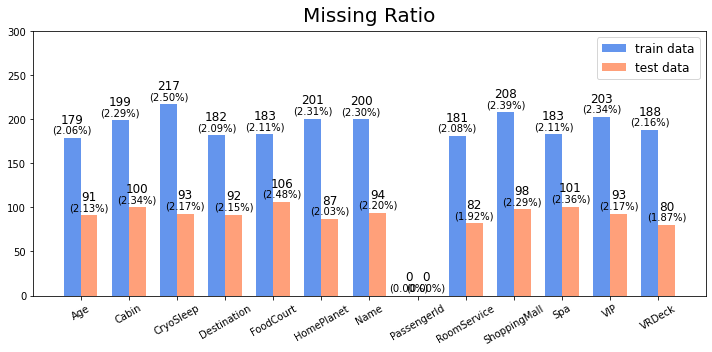

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

width = 0.35
x = np.arange(len(train.columns[:-1].to_list()))
x_ = sorted(test.columns.to_list())
y1 = train_miss['missing'][:-1].sort_index()
y1_ = train_miss['ratio'][:-1].sort_index()
y2 = test_miss['missing'].sort_index()
y2_ = test_miss['ratio'].sort_index()

bar1 = ax.bar(x-width/2, y1, width, label="train data", color="cornflowerblue")
bar2 = ax.bar(x+width/2, y2, width, label="test data", color="lightsalmon")
    
ax.set_xticks(x, x_, rotation=30)
ax.set_ylim(0,300)
ax.bar_label(bar1, padding=12, size=12)
ax.bar_label(bar2, padding=12, size=12)
ax.bar_label(bar1, labels=['(%.2f%%)' %y for y in y1_], padding=3, size=10)
ax.bar_label(bar2, labels=['(%.2f%%)' %y for y in y2_], padding=3, size=10)
ax.set_title("Missing Ratio", pad=10, size=20)
ax.legend(loc='best', fontsize=12)

fig.tight_layout()
plt.show()

#### The ratio of missing values by each feature is less than 3%.
- The numerical features will be replaced by the median value.
- The categorical features will be replaced by the most frequent value.

## Target Distribution

In [13]:
train_0 = train[train['Transported']==False]
train_1 = train[train['Transported']==True]

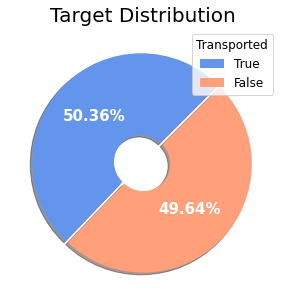

In [14]:
fig, ax = plt.subplots(figsize=(5,5))

labels = train["Transported"].value_counts().index
lst = train["Transported"].value_counts().to_list()
pie = ax.pie(lst, labels = labels, autopct='%.2f%%',
             textprops=dict(color="white", fontsize=15, weight="bold"),
             colors=["cornflowerblue", "lightsalmon"], shadow=True,
             wedgeprops=dict(width=0.75), startangle=45, explode=(0.025,0))

ax.set_title("Target Distribution", size=20)
ax.legend(title="Transported", title_fontsize=12, loc='best', fontsize=12)

plt.show()

## Categorical Feature Distribution 

In [15]:
train_cat = train.select_dtypes(include = 'object')
test_cat = test.select_dtypes(include = 'object')
col_cat = train_cat.columns.to_list()
print(col_cat)

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']


In [16]:
def dist_cat(col_name):
    fig, ax = plt.subplots(1,2,figsize=(10,5))

    width = 0.35
    x = train_cat.loc[:,col_name].value_counts().index
    bar1 = ax[0].bar(x, train_cat.loc[:,col_name].value_counts().to_list(),
                     width, label = "Train Data", color="cornflowerblue")
    bar2 = ax[0].bar(x, test_cat.loc[:,col_name].value_counts().to_list(),
                     width, label = "Test Data", color="lightsalmon")
    bar3 = ax[1].bar(np.arange(len(x)) - width/2,
                     train_1.loc[:,col_name].value_counts().to_list(),
                     width, label = "Target True", color="cornflowerblue")
    bar4 = ax[1].bar(np.arange(len(x)) + width/2,
                     train_0.loc[:,col_name].value_counts().to_list(),
                     width, label = "Target False", color="lightsalmon")
    
    ax[0].bar_label(bar1, size=12)
    ax[0].bar_label(bar2, size=12, color="w")
    ax[1].bar_label(bar3, size=12)
    ax[1].bar_label(bar4, size=12)
    
    ax[0].set_title(f'{col_name} Distribution',pad=10, size=15)
    ax[1].set_title(f'{col_name} by Target (Train Data)',pad=10, size=15)
    ax[0].set_xticks(x, x, size=12)
    ax[1].set_xticks(np.arange(len(x)), x, size=12)
    
    ax[0].legend(loc="best", fontsize=12)
    ax[1].legend(loc="best", fontsize=12)

    fig.tight_layout()
    return plt.show()

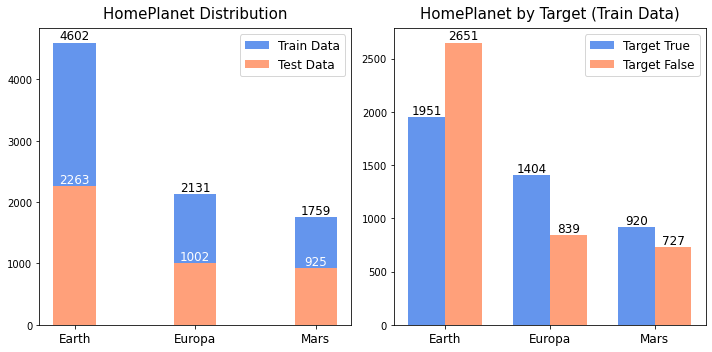

In [17]:
dist_cat('HomePlanet')

### HomePlanet
**3 categories (Earth, Europa, Mars)**  <br/> Earth account for more than half of both Train and Test.

- **Earth** : False in Transported is certainly high.
- **Europa** : True in Tranported is certainly high.
- **Mars** : True in Tranported is a little high, but there is not much difference.



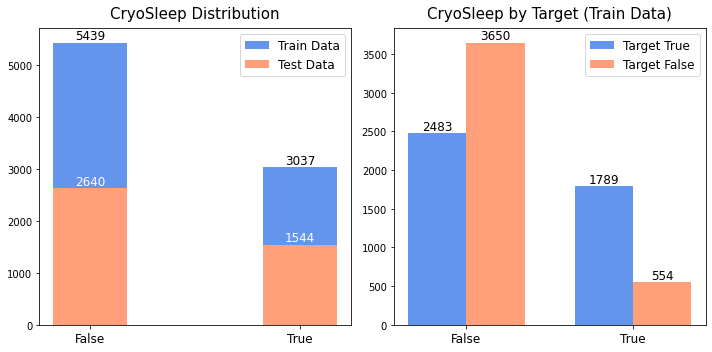

In [18]:
dist_cat('CryoSleep')

### CryoSleep distribution
**Boolean (False / True)**  <br/> False is nearly twice as many as True of both Train and Test.

- **False** : False in Transported is certainly high.
- **True** : True in Tranported is more than three times.


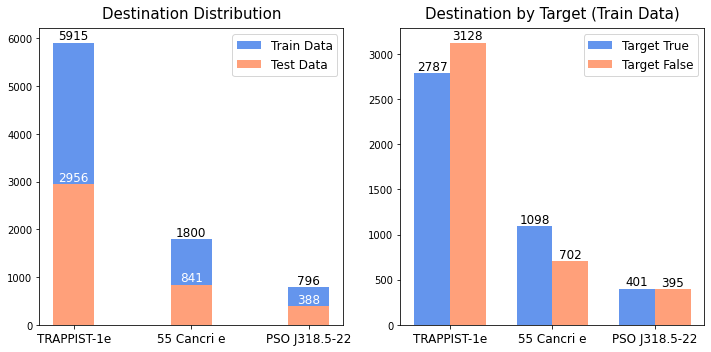

In [19]:
dist_cat('Destination')

### Destination distribution
**3 categories (TRAPPIST-1e, 55 Cancri e, PSO J318.5-22)** <br/> TRAPPIST-1e accounts for approximately 70 percent of both Train and Test.

- **TRAPPIST-1e** : False in Transported is a little high, but there is not much difference.
- **55 Cancri e** : True in Tranported is certainly high.<br/>
- **PSO J318.5-22** : Little difference in distribution by target.


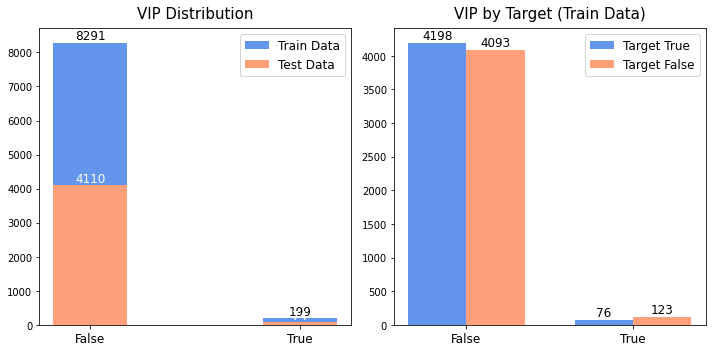

In [20]:
dist_cat('VIP')

#### VIP distribution
**Boolean (False / True)**  <br/> False accounts for almost all data

- Little difference in distribution for the target variable, whether VIP is True or False.

## Numeric Feature Distribution

In [21]:
numeric = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_num = train.select_dtypes(include = numeric)
test_num = test.select_dtypes(include = numeric)
col_num = train_num.columns.to_list()
col_num

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

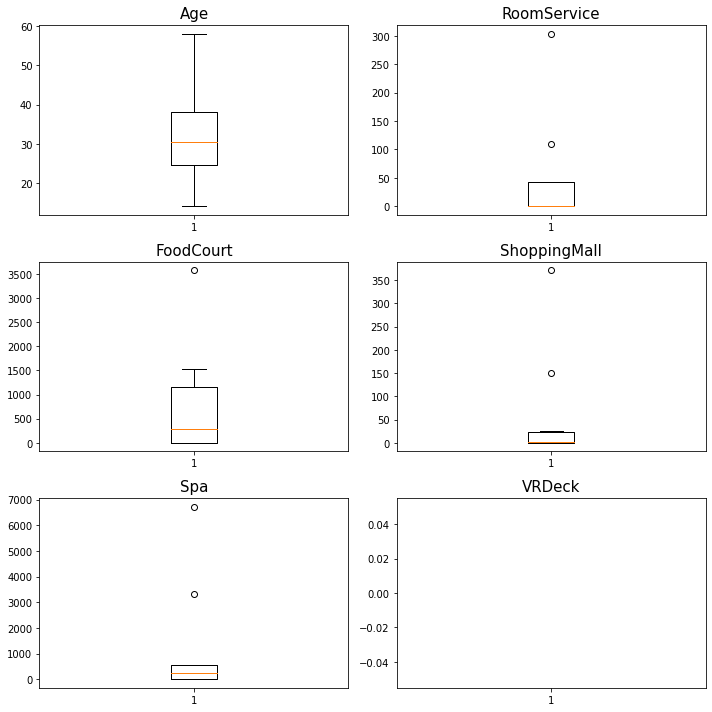

In [22]:
fig, ax = plt.subplots(3,2,figsize=(10,10))

for i in range(3):
    for j in range(2):
        ax[i, j].boxplot(train_num.iloc[:,2*i+j].tolist()[:10])
        ax[i, j].set_title(col_num[2*i+j], pad=7, size=15)

fig.tight_layout()
plt.show()

#### Except Age, all numeric features have a very unbalanced distribution.
- They seem necessary to convert variables such as encoding, scaling, and standardization.

## Feature Correlation

In [23]:
train.iloc[:,:-1].corr().style.background_gradient(
                        cmap="RdBu", axis=None, vmin=-0.4, vmax=0.4)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000


#### There seems to be little correlation between features.
- Issues such as multicollinearity don't have to be considered.

# Step 3. Data Preproccessing
#### - Feature engineering, standardization, one-hot encoding, etc
#### - Create derived variables and descibe why you made this variable.

## Removal of unnecessary variables
- Text features, such as PassengerID, Cabin, and Name, is not necessary in ML model.
- PassengerId will be used in the final submission data.

In [24]:
remove_cols = ['PassengerId', 'Name', 'Cabin']
PassengerId = test['PassengerId']

print("Before Removal")
print("\tTrain data:", train.shape, "/ Test data:", test.shape)
train_data = train.drop(remove_cols, axis=1)
test_data = test.drop(remove_cols, axis=1)

print("After Removal")
print("\tTrain data:", train_data.shape, "/ Test data:", test_data.shape)

Before Removal
	Train data: (8693, 14) / Test data: (4277, 13)
After Removal
	Train data: (8693, 11) / Test data: (4277, 10)


## Preprocessing Pipeline

### Imputing Missing Values
- The numerical features will be replaced by the median value.
- The categorical features will be replaced by the most frequent value.

### Numeric Feature Scailing
- Age does not require scaling.
- Robustscaler is better suited to reduce the impact of extreme values.

### Categorical Feature Encoding
- Ordinal Feature - Ordinal Encoding / Nominal Feature - Onehot Encoding
- The categorical features in this model are all nominal.

In [25]:
print(col_num)
col_cat.remove('PassengerId')
col_cat.remove('Cabin')
col_cat.remove('Name')
print(col_cat)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


In [26]:
y = train_data['Transported'].copy().astype(int)
X = train_data.drop('Transported', axis=1).copy()
X_test = test_data.copy()

In [27]:
numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='median')),
       ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='most_frequent')),
       ('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer(
   transformers=[
     ('num', numeric_transformer, col_num),
     ('cat', categorical_transformer, col_cat)],
    remainder='passthrough')

X = preprocessor.fit_transform(X)
X_test = preprocessor.transform(X_test)

In [28]:
'''
# --- < Ordinal Encoding > ---
ord = OrdinalEncoder()
train_data[col_cat] = ord.fit_transform(train_data[col_cat])
test_data[col_cat] = ord.fit_transform(test_data[col_cat])

train_data.info()
'''

'\n# --- < Ordinal Encoding > ---\nord = OrdinalEncoder()\ntrain_data[col_cat] = ord.fit_transform(train_data[col_cat])\ntest_data[col_cat] = ord.fit_transform(test_data[col_cat])\n\ntrain_data.info()\n'

In [29]:
'''
# --- < One-Hot Encoding > ---
transformer = make_column_transformer(
    (OneHotEncoder(), col_cat), remainder='passthrough')

train_transformed = transformer.fit_transform(train_data[col_cat])
train_transformed_df = pd.DataFrame(train_transformed,
                                    columns=transformer.get_feature_names_out())
train_data = pd.concat([train_data, train_transformed_df], axis = 1)
train_data = train_data.drop(col_cat, axis = 1)

test_transformed = transformer.fit_transform(test_data[col_cat])
test_transformed_df = pd.DataFrame(test_transformed,
                                   columns=transformer.get_feature_names_out())
test_data = pd.concat([test_data, test_transformed_df], axis = 1)
test_data = test_data.drop(col_cat, axis = 1)
train_data.info()
'''

"\n# --- < One-Hot Encoding > ---\ntransformer = make_column_transformer(\n    (OneHotEncoder(), col_cat), remainder='passthrough')\n\ntrain_transformed = transformer.fit_transform(train_data[col_cat])\ntrain_transformed_df = pd.DataFrame(train_transformed,\n                                    columns=transformer.get_feature_names_out())\ntrain_data = pd.concat([train_data, train_transformed_df], axis = 1)\ntrain_data = train_data.drop(col_cat, axis = 1)\n\ntest_transformed = transformer.fit_transform(test_data[col_cat])\ntest_transformed_df = pd.DataFrame(test_transformed,\n                                   columns=transformer.get_feature_names_out())\ntest_data = pd.concat([test_data, test_transformed_df], axis = 1)\ntest_data = test_data.drop(col_cat, axis = 1)\ntrain_data.info()\n"

# Step 4. ML Model

## Data Split
#### Split train data and validation data (7:3)

In [30]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42)
print("Train data\t:", X_train.shape, y_train.shape)
print("Validation data\t:", X_val.shape, y_val.shape)

Train data	: (6085, 14) (6085,)
Validation data	: (2608, 14) (2608,)


## Model Selection
#### Apply grid search to select the best model and hyperparameters

In [31]:
# define classifier
classifiers = {
    "KNN" : KNeighborsClassifier(),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "RandomForest" : RandomForestClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42),
}

# define grid
KNN_grid = {'n_neighbors': [5, 7, 9],
            'p': [1, 2]}

LR_grid = {'penalty': ['l1','l2'],
           'C': [0.5, 1, 1.5],
           'max_iter': [50, 100, 150]}

RF_grid = {'n_estimators': [100, 200, 300],
        'max_depth': [4, 8, 12]}

LGBM_grid = {'n_estimators': [50, 100, 150],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

grid = {
    "KNN" : KNN_grid,
    "LogisticRegression" : LR_grid,
    "RandomForest" : RF_grid,
    "LGBM" : LGBM_grid,
}

In [32]:
i=0
clf_best_params = classifiers.copy()
valid_scores = pd.DataFrame({
                    'Classifer':classifiers.keys(),
                    'Validation accuracy': np.zeros(len(classifiers)),
                    'Training time': np.zeros(len(classifiers))
                    })

for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]=clf.score(X_val, y_val)
    clf_best_params[key]=clf.best_params_
    
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

Model: KNN
Training time (mins): 0.05

Model: LogisticRegression
Training time (mins): 0.02

Model: RandomForest
Training time (mins): 0.28

Model: LGBM
Training time (mins): 0.14



In [33]:
# best parameters from grid search
clf_best_params

{'KNN': {'n_neighbors': 9, 'p': 2},
 'LogisticRegression': {'C': 0.5, 'max_iter': 50, 'penalty': 'l2'},
 'RandomForest': {'max_depth': 8, 'n_estimators': 200},
 'LGBM': {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 50}}

In [34]:
valid_scores

,Classifer,Validation accuracy,Training time
0,KNN,0.784893,0.05
1,LogisticRegression,0.776840,0.02
2,RandomForest,0.792945,0.28
3,LGBM,0.792561,0.14


#### **RandomForest** and **LGBM** is suitable<br/> because they are better in terms of validation accuracy.

# Step 5. Model Evaluation

## 10-fold Cross Validation

In [35]:
models = {
    "RandomForest" :
    RandomForestClassifier(**clf_best_params["RandomForest"], random_state=42),
    "LGBM" :
    LGBMClassifier(**clf_best_params["LGBM"], random_state=42)
    }

In [36]:
FOLDS=10
preds=np.zeros(len(X_test))

for key, classifier in models.items():
    start = time.time()
    
    score=0
    cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=42)
    
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train, X_valid = X[train_idx], X[val_idx]
        y_train, y_valid = y[train_idx], y[val_idx]

        clf = classifier
        clf.fit(X_train, y_train)

        preds += clf.predict_proba(X_test)[:,1]
        score += clf.score(X_valid, y_valid)

    score /= FOLDS
    stop = time.time()

    print('Model:', key)
    print('Average validation accuracy:', np.round(100*score,2))
    print('Training time (mins):', np.round((stop - start)/60,2))
    print('')

Model: RandomForest
Average validation accuracy: 79.2
Training time (mins): 0.21

Model: LGBM
Average validation accuracy: 79.68
Training time (mins): 0.01



## Ensemble predictions

In [37]:
preds /= (FOLDS*len(models))
preds = np.round(preds).astype(bool)

# Step 6. Submission

In [38]:
submission = pd.read_csv(BASE_DIR + "sample_submission.csv")
submission['Transported'] = preds
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [39]:
submission.to_csv('submission.csv', index=False)

# ** Reference
- https://www.kaggle.com/code/odins0n/spaceship-titanic-eda-27-different-models
- https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide

# ** Score List
- Submit 1 (22.04.04) : acc = **0.78840** (795/1150)
- Submit 2 (22.04.06) : acc = **0.79284** (697/1198)